In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

In [237]:
clients = pd.read_csv('ads_clients_data.csv', parse_dates= ['date','create_date'])

In [238]:
clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [9]:
clients.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [15]:
data = pd.read_csv('ads_data.csv', parse_dates= ['date'])

In [22]:
data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [21]:
data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [20]:
data['time'] = pd.to_datetime(data.time, format='%Y-%m-%d %H:%M:%S')

In [34]:
events = data.groupby(['ad_id', 'event'], as_index = False)\
    .agg({'platform':'count'})\
    .rename(columns = {'platform':'cont_events'})

In [35]:
events.head()

,ad_id,event,cont_events
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [57]:
events_pivot= events.pivot_table(index = 'ad_id', columns = 'event', values = 'cont_events').fillna(0).reset_index()

In [58]:
events_pivot.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [59]:
events_pivot.view.mean()

923.1316062176165

In [78]:
events_pivot['log_view'] = events_pivot.view.apply(lambda x: np.log(x))

In [88]:
events_pivot.head(20)

event,ad_id,click,view,log_view
0,2,1.0,101.0,4.615121
1,3,3.0,184.0,5.214936
2,1902,1.0,41.0,3.713572
3,2064,0.0,35.0,3.555348
4,2132,1.0,58.0,4.060443
5,2468,0.0,39.0,3.663562
6,2494,1.0,324.0,5.780744
7,2604,4.0,402.0,5.996452
8,2709,14.0,2628.0,7.873978
9,3787,6.0,359.0,5.883322


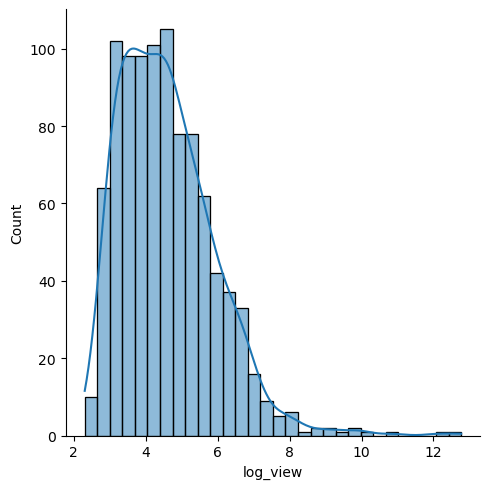

In [92]:
sns.displot(events_pivot['log_view'], kde = True)

In [93]:
data.head(1)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269


In [96]:
views = data.query('event == "view"')\
    .groupby(['date', 'ad_id'], as_index = False)\
    .agg({'event':'count'})\
    .rename(columns = {'event':'count_views'})

In [97]:
views.head()

,date,ad_id,count_views
0,2019-04-01,2,83
1,2019-04-01,3,158
2,2019-04-01,4922,1211
3,2019-04-01,4933,642
4,2019-04-01,9418,17


In [ ]:
views.groupby('date')\
    .agg({'ad_id':'count', 'count_views':'sum'})\
    .rename(columns = {'ad_id':'count

In [102]:
view = views.groupby('date')\
    .agg({'ad_id':'count', 'count_views':'sum'})\
    .rename(columns = {'ad_id':'count_ad_id'})

In [116]:
view

,count_ad_id,count_views,mean,rolling_mean,diff
date,,,,,
2019-04-01,141,21782,154.482270,NaN,NaN
2019-04-02,338,46572,137.786982,146.134626,8.347644
2019-04-03,360,59023,163.952778,150.869880,13.082898
2019-04-04,407,275092,675.901720,419.927249,255.974471
2019-04-05,465,427386,919.109677,797.505699,121.603979
2019-04-06,220,60967,277.122727,598.116202,320.993475


In [104]:
view['mean'] = view.count_views / view.count_ad_id

In [107]:
view['rolling_mean'] = view['mean'].rolling(2).mean()

In [115]:
view['diff'] = abs(view['mean'] - view['rolling_mean'])

<AxesSubplot:xlabel='date'>

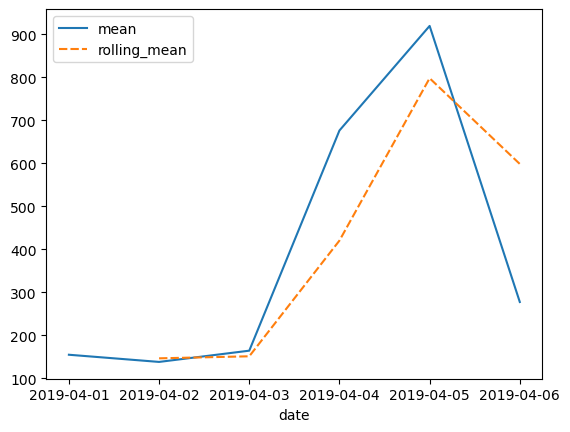

In [114]:
sns.lineplot(data = view[['mean','rolling_mean']])

In [239]:
clients.head(1)

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24


In [119]:
data.head(1)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269


In [240]:
clients.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [241]:
first_ad = data.groupby('client_union_id', as_index = False)\
    .agg({'date':'min'})

In [242]:
first_ad.head()

,client_union_id,date
0,1,2019-04-01
1,9,2019-04-03
2,13,2019-04-02
3,16,2019-04-03
4,20,2019-04-02


In [243]:
clinents = clients.merge(first_ad, how = 'inner', on = 'client_union_id')

In [244]:
clinents.head()

,date_x,client_union_id,community_id,create_date,date_y
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01
1,2020-05-07,9,-130215524,2018-12-10,2019-04-03
2,2020-05-07,13,-130623793,2019-01-26,2019-04-02
3,2020-05-07,16,-130748007,2018-12-19,2019-04-03
4,2020-05-07,20,-130189700,2019-03-01,2019-04-02


In [139]:
clinents['Diff'] = clinents['date_y'] - clinents['create_date']

In [141]:
clinents.Diff.mean()

Timedelta('124 days 09:04:43.532219570')

In [142]:
clients.head(2)

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10


In [143]:
data.head(1)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269


In [245]:
temp = data.groupby(['client_union_id', 'campaign_union_id'], as_index = False)\
    .agg({'date':'min'})\
    .groupby('client_union_id', as_index = False)\
    .agg({'date':'min'})\
    .rename(columns = {'date':'min_date'})

In [246]:
temp.head(1)

,client_union_id,min_date
0,1,2019-04-01


In [247]:
clients = clients.merge(temp, on = 'client_union_id', how = 'left')

In [248]:
clients.head()

,date,client_union_id,community_id,create_date,min_date
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01
1,2020-05-07,2,-130304626,2019-02-10,NaT
2,2020-05-07,3,-130462599,2019-01-25,NaT
3,2020-05-07,4,-130574300,2018-12-09,NaT
4,2020-05-07,5,-130292358,2019-01-08,NaT


In [249]:
clients.shape

(122078, 5)

In [258]:
clients['differ'] = clients.min_date - clients.create_date

In [193]:
ref = pd.Timedelta(365, unit='d')

In [172]:
clients.dtypes

date                datetime64[ns]
client_union_id              int64
community_id                 int64
create_date         datetime64[ns]
min_date            datetime64[ns]
diff               timedelta64[ns]
ref                timedelta64[ns]
dtype: object

In [218]:
clients_365 = clients[clients.differ <= ref]

In [227]:
100*clients_365.shape[0]/clients.shape[0]

0.6864463703533806

In [226]:
clients_365.shape[0]

838

In [260]:
clients.differ.fillna(pd.Timedelta(366, unit='d'), inplace = True)

In [284]:
clients.head()

,date,client_union_id,community_id,create_date,min_date,differ,diff_cat
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,98 days,90-180
1,2020-05-07,2,-130304626,2019-02-10,NaT,366 days,NaN
2,2020-05-07,3,-130462599,2019-01-25,NaT,366 days,NaN
3,2020-05-07,4,-130574300,2018-12-09,NaT,366 days,NaN
4,2020-05-07,5,-130292358,2019-01-08,NaT,366 days,NaN


In [281]:
L = ['00:00:00', ' 30 days 00:00:00', '90 days 00:00:00', '180 days 00:00:00', '365 days 00:00:00']
bins = pd.to_timedelta(L).total_seconds()

In [282]:
labels = ['0-30','30-90','90-180','180-365']

In [283]:
clients['diff_cat'] = pd.cut(clients.differ.dt.total_seconds(),bins , labels = labels)

In [277]:
val_count = clients.diff_cat.value_counts()

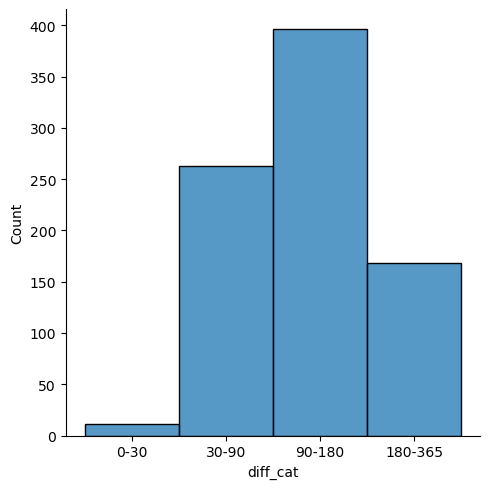

In [285]:
sns.displot(data = clients.diff_cat)